In [1]:
%load_ext autoreload
%autoreload 2

In [152]:
import re
import pandas as pd
from gplearn.tests.test_genetic import *
from gplearn._program import _Program
from gplearn.genetic import _all_func_dictionary, _fitness_map
from gplearn.extra_fitness import *

In [71]:
df = pd.read_parquet('/home/pennymax/proj/MFM/CrossSection/v1_basic/results/basic_2023-11-22_22:15:18/fct_man_ta_proc.parquet')
df = df.query('time > "2021-01-01 00:00:00+00:00"')
df

,,AR_26,BCKRET1_ALMA_10_6.0_0.85,BCKRET1_ANGLEd_1,BCKRET1_APO_12_26,BCKRET1_BIAS_SMA_26,BCKRET1_CFO_9,BCKRET1_CG_10,BCKRET1_CMO_14,BCKRET1_COPC_11_14_10,BCKRET1_CTI_12,...,premIdx_close,premIdx_high,premIdx_low,premIdx_open,spot_QuoVol,spot_TakerBuyQuoVol,spotum_quo_rt1,spotum_quo_rt3,spotum_quo_rt5,fwdret1
time,symbol,,,,,,,,,,,,,,,,,,,,,
2022-02-15 00:00:00+00:00,1000BTTCUSDT,0.301435,0.275936,-0.488968,0.771073,-1.161410,0.358964,-0.067306,0.607884,-0.221017,0.085637,...,0.654780,1.305227,-1.578736,0.773644,-0.286571,-0.290574,-1.698317,-1.750555,-1.797949,0.006381
2022-02-15 08:00:00+00:00,1000BTTCUSDT,0.203825,0.346633,-0.102897,0.670855,-0.063863,-0.128800,-0.200930,-0.632266,-0.184119,-0.056086,...,0.654619,1.852459,-2.511996,-3.652448,-0.281280,-0.280721,-1.825539,-1.865662,-1.797600,0.005435
2022-02-15 16:00:00+00:00,1000BTTCUSDT,0.109859,0.194290,-0.281913,-0.625057,-0.035205,-0.048292,-0.183299,-0.913829,-0.256562,-0.479517,...,0.429367,1.520373,-0.490996,0.573695,-0.311542,-0.305104,-1.896369,-1.871790,-1.849618,-0.001351
2022-02-16 00:00:00+00:00,1000BTTCUSDT,-0.026714,0.305321,0.818629,-0.432105,-0.135898,0.066802,-0.001660,0.009961,-0.201409,-0.858671,...,5.207442,2.838670,-1.876175,0.332018,-0.333334,-0.335837,-1.982989,-1.945231,-1.941199,-0.026613
2022-02-16 08:00:00+00:00,1000BTTCUSDT,-0.038897,0.149609,0.062552,-0.885780,-0.009816,-0.113658,0.227472,-0.964727,-0.254134,-0.789266,...,0.377948,2.072545,-2.015252,0.486841,-0.345787,-0.341323,-1.852673,-2.017361,-1.978387,0.007878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-19 08:00:00+00:00,ZRXUSDT,3.664874,-3.113825,-1.648899,-5.691401,-0.116280,-0.002034,0.123369,-1.341036,0.297297,-0.282686,...,-0.606585,-0.537085,-0.761102,-0.556576,-0.180849,-0.182091,2.612331,1.771783,2.564827,0.031750
2023-11-19 16:00:00+00:00,ZRXUSDT,2.537322,-2.549892,1.657452,-3.906109,0.200481,0.048510,0.013754,-0.415205,0.089457,0.273883,...,-1.876145,-1.285125,-0.262280,-0.726266,-0.179718,-0.181448,3.599520,1.947164,2.446037,-0.007005
2023-11-20 00:00:00+00:00,ZRXUSDT,2.659109,-2.900207,-0.704719,-3.857578,-3.198881,0.147065,-0.106040,-0.386359,-0.024935,0.805087,...,-1.187991,-0.596983,-0.625408,-2.571711,-0.198680,-0.209446,2.944125,3.235569,2.244819,0.010330


In [26]:
df.reset_index().sort_values('time').time.unique()

<DatetimeArray>
['2021-01-01 08:00:00+00:00', '2021-01-01 16:00:00+00:00',
 '2021-01-02 00:00:00+00:00', '2021-01-02 08:00:00+00:00',
 '2021-01-02 16:00:00+00:00', '2021-01-03 00:00:00+00:00',
 '2021-01-03 08:00:00+00:00', '2021-01-03 16:00:00+00:00',
 '2021-01-04 00:00:00+00:00', '2021-01-04 08:00:00+00:00',
 ...
 '2023-11-17 16:00:00+00:00', '2023-11-18 00:00:00+00:00',
 '2023-11-18 08:00:00+00:00', '2023-11-18 16:00:00+00:00',
 '2023-11-19 00:00:00+00:00', '2023-11-19 08:00:00+00:00',
 '2023-11-19 16:00:00+00:00', '2023-11-20 00:00:00+00:00',
 '2023-11-20 08:00:00+00:00', '2023-11-20 16:00:00+00:00']
Length: 3161, dtype: datetime64[ns, UTC]

In [153]:
def _get_X_y(df):
    dfX = df.drop(columns=[col for col in df.columns if col.startswith('fwdret')])
    feature_names = list(dfX.columns)
    dfX = dfX.unstack()
    X = dfX.values.reshape(len(dfX), len(feature_names), -1)

    y = df[['fwdret1']].unstack().to_numpy()
    return X, y, feature_names

def convert_expression_to_gp_program(expression: str, function_set: dict, feature_names: list) -> _Program:
    ## convert expression to list function obj and feature index
    tokens = re.findall(r'[\w.]+|\(|\)|,', expression)
    tokens = [t for t in tokens if t not in ['(', ')', ',']]
    # print(tokens)
    program = []
    for token in tokens:
        if token in function_set:
            program.append(function_set[token])
        elif token in feature_names:
            program.append(feature_names.index(token))
        elif token.isdigit():
            program.append(int(token))
        elif token.replace('.', '', 1).isdigit():
            program.append(float(token))
        else:
            print(f'!! unknown token found! {token}')
            return None
    # print(program)

    ## get arity dict
    arities = {}
    for function in function_set.values():
        arity = function.arity
        arities[arity] = arities.get(arity, [])
        arities[arity].append(function)

    ## construct _Program obj
    params = {
            'function_set': function_set,
            'arities': arities,
            'n_features': len(feature_names),
            'feature_names': feature_names,
            'init_depth': (2, 6),
            ## must inputs
            'init_method': 'half and half',
            'const_range': (-1.0, 1.0),
            'metric': 'mean absolute error',
            'p_point_replace': 0.05,
            'parsimony_coefficient': 0.1,
            'random_state': check_random_state(415),
            }
    gp = _Program(program=program, **params)
    return gp

In [154]:
X, y, feature_names = _get_X_y(df)

In [164]:
exp = 'sub(mul(BCKRET1_MOM_5, SPOTVOLUME_TSIs_13_25_13), premIdx_close)'
exp = 'sub(SPOT_COPC_11_14_10, ts_correlation_20(SPOTTAKERBUYQUOVOL_PPOh_12_26_9, TRDCNT_TSI_13_25_13))'
exp = 'inv(rank(TZS60_spot_Close))'
exp = 'ts_mean_20(inv(inv(TZS60_spot_Close)))'
exp = 'min(NETBUYQUO1_FWMA_10, ts_min_10(TZS60_SPOT_HLC3))'
exp = 'neg(add(premIdx_close, max(TZS60_VOLUME_PPO_12_26_9, PREMCLOSE_MACDs_12_26_9)))'
exp = 'sub(min(ts_mean_10(bckret1), netbuyquo3), max(ts_min_3(QuoVol), premIdx_close))'
exp = 'netbuyquo3'
# exp = 'sub(netbuyquo3, premIdx_close)'
exp = 'sub(ts_min_10(TZS60_spot_Close), premIdx_close)'
# exp = 'ts_max_20(ts_mean_10(scale_1(premIdx_low)))'
exp = 'ts_max_20(ts_mean_10(scale_1(premIdx_low)))'

print(f'ori expression: {exp}')
feature_names = df.columns.to_list()
gp = convert_expression_to_gp_program(exp, _all_func_dictionary, feature_names)
print(f'_Program print: {gp}')

y_pred = gp.execute_3D(X)
metric_func = _fitness_map['quantile35_longshort_cagr_comprod_with_fee']
metric_val = metric_func(y, y_pred, np.ones(X.shape[0]))
print(metric_val)
metric_func = _fitness_map['quantile35_longshort_sharpe_fine_comprod_with_fee']
metric_val = metric_func(y, y_pred, np.ones(X.shape[0]))
print(metric_val)

ori expression: ts_max_20(ts_mean_10(scale_1(premIdx_low)))
_Program print: ts_max_20(ts_mean_10(scale_1(premIdx_low)))
-0.40704845224564135
-0.528234142587821


In [173]:
display(y_pred)
inf_indices = np.where(np.isinf(y_pred))
print(inf_indices)

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
        1.62659184e+14, 2.71557814e+14, 4.04770104e+14],
       [           nan,            nan,            nan, ...,
        1.62659184e+14, 2.71557814e+14, 4.04770104e+14],
       [           nan,            nan,            nan, ...,
        1.62659184e+14, 2.71557814e+14, 4.04770104e+14]])

(array([], dtype=int64), array([], dtype=int64))


<Axes: >

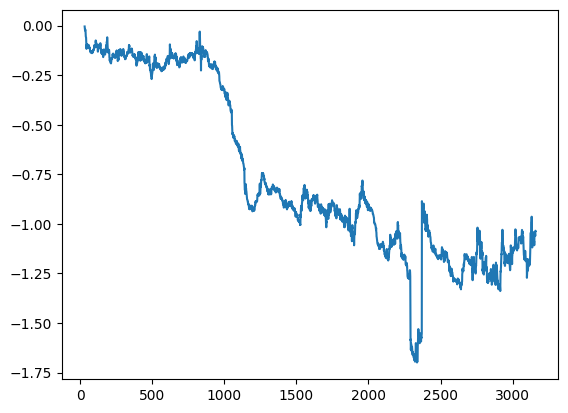

In [167]:
quantile = 35
fee_rate = 0.001
longshort_rets = quantile_longshort_returns(y, y_pred, np.ones(X.shape[0]), quantile, 0.001)
longshort_rets.cumsum().plot()

In [168]:
display(longshort_rets)
inf_indices = np.where(np.isinf(longshort_rets))
print(inf_indices)

28           NaN
29     -0.004348
30     -0.011052
31     -0.003042
32     -0.006442
          ...   
3156   -0.006501
3157   -0.005083
3158   -0.006219
3159    0.026389
3160   -0.001963
Length: 3133, dtype: float64

(array([], dtype=int64),)


<Axes: >

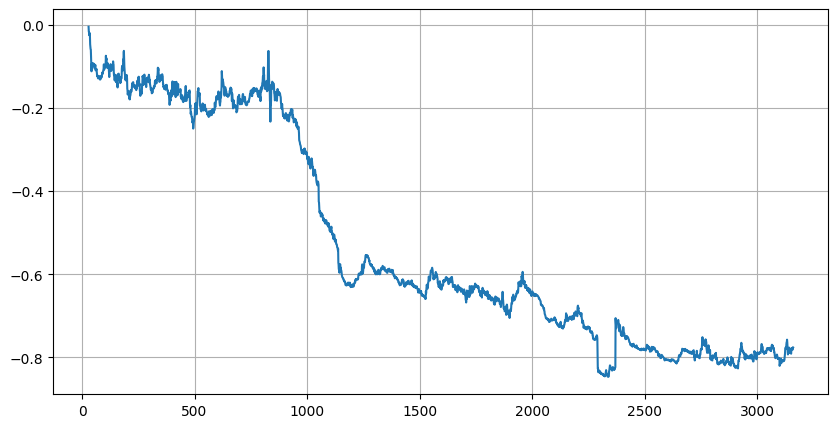

In [169]:
longshort_rets.add(1).cumprod().sub(1).plot(figsize=(10, 5), grid=True)

(15.221931891563557, 572.2756039915035, 0.45004787743376956)

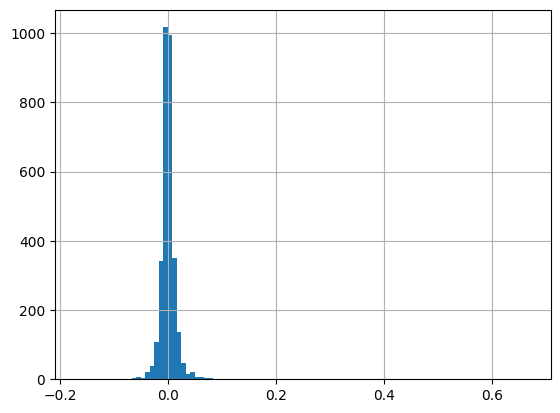

In [170]:
longshort_rets.hist(bins=100)
longshort_rets.skew(), longshort_rets.kurt(), longshort_rets[longshort_rets > 0].count() / longshort_rets.shape[0]

In [171]:
total_return(longshort_rets, comp=True), total_return(longshort_rets, comp=False)

(-0.775836211848562, -1.0361764733851555)

In [172]:
sharpe_simple(longshort_rets, annual_bar_8h), sharpe_fine(longshort_rets, True, annual_bar_8h), sharpe_fine(longshort_rets, False, annual_bar_8h)

(-0.5992598505544655, -0.528234142587821, -0.47011753889601116)